# **Домашнее задание №1 (base)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

**Максимальная оценка за дз**
> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**

**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

**Задание 0 (0 баллов).**
Для чего фиксируем сиды в домашках?

Ответ:

Чтобы random процессы были воспроизводимы, давали одинаковые результаты при проверках.

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [2]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

In [3]:
print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.55 балла)**

Выполните операции, направленные на практику основных действий с `pandas`:
- [ ] Отобразите 10 случайных строк тренировочного датасета (0.15 балла)
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета (0.1 балла)
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)


**Бонус**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)

In [4]:
# 10 случайных строк
df_train.sample(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


In [5]:
# 5 первых
df_test.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


In [6]:
# 5 последних
df_test.tail(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


In [7]:
# пропуски
df_test.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage,19
engine,19


In [8]:
df_test.columns[df_test.isnull().any()]

Index(['mileage', 'engine', 'max_power', 'torque', 'seats'], dtype='object')

На тестовой выборке пропуски имеются в 'mileage', 'engine', 'max_power', 'torque', 'seats'.

In [9]:
df_train.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage,202
engine,202


In [10]:
df_train.columns[df_train.isnull().any()]

Index(['mileage', 'engine', 'max_power', 'torque', 'seats'], dtype='object')

На тренировочной выборке пропуски имеются в тех же колонках, что и в тестовой, но в бо́льшем количестве.

In [11]:
# явные дубликаты
df_train.duplicated().sum()

985

In [12]:
df_test.duplicated().sum()

62

И в test, и в train имеются явные дубликаты.

In [13]:
#!pip install ydata-profiling
#from ydata_profiling import ProfileReport as pr

#dash_train = ProfileReport(df_train)
#dash_test = ProfileReport(df_test)

In [14]:
#dash_train.to_file("df_trainPR.html")

In [15]:
#dash_test.to_file("df_testPR.html")

Полученные отчеты: https://drive.google.com/drive/folders/1CaZkKA4mJ8v7vC6G3ZdbO-URRER7NBr5?usp=sharing

Мы обнаружили пропуски. Давайте избавимся от них.

- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

In [16]:
df_train.isna().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage,202
engine,202


Перед заполнением пропусков медианой преобразую значения в столбцах - чтобы получать только численные значения.

In [17]:
df_train['mileage'] = pd.to_numeric(df_train['mileage'].str.extract(r'(\d+\.\d+)')[0], errors='coerce')

In [18]:
df_train['engine'] = pd.to_numeric(df_train['engine'].str.extract(r'(\d+)')[0], errors='coerce')

In [19]:
df_train['max_power'] = pd.to_numeric(df_train['max_power'].str.extract(r'(\d+\.?\d*)')[0], errors='coerce')

In [20]:
df_train['seats'].unique()

array([ 5.,  4., nan,  7.,  8.,  6.,  9., 10., 14.,  2.])

In [21]:
med = df_train[['mileage', 'engine', 'max_power', 'seats']].median()

med

,0
mileage,19.3
engine,1248.0
max_power,82.0
seats,5.0


In [22]:
for column in med.index:
    df_train[column] = df_train[column].fillna(med[column])

In [23]:
df_train.isna().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage,0
engine,0


Torque оставил, так как далее следует удаление этого признака; для тестовой выборки пропуски заполню после преобразования значений, чтобы новые NaN не возникали в случае ошибок.

### **Задание 2 (0.5 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [24]:
# только матрица X
xonly = df_train.drop(columns=['selling_price'])

In [25]:
xonly.duplicated(keep='first').sum()

1159

In [26]:
df_train = df_train.drop_duplicates(subset=xonly, keep='first')

In [27]:
df_train.reset_index(drop=True, inplace=True)

In [28]:
assert df_train.shape == (5840, 13)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [29]:
df_test['mileage'] = pd.to_numeric(df_test['mileage'].str.extract(r'(\d+\.\d+)')[0], errors='coerce')

In [30]:
df_test['mileage'].unique()

array([14.  , 21.5 , 12.9 , 25.1 , 16.5 , 16.55, 18.  , 18.5 , 19.7 ,
       19.67, 22.  , 22.37, 25.8 , 20.36, 18.16,  9.5 , 16.02, 19.4 ,
       17.  , 16.36, 22.9 , 19.  , 21.9 , 28.4 , 25.83, 16.  , 24.  ,
       21.19, 17.3 , 19.6 , 12.8 , 14.09,   nan, 20.3 , 22.3 , 13.7 ,
       14.3 , 19.3 , 19.09, 26.6 , 15.96, 20.86, 15.37, 19.5 , 21.1 ,
       20.77, 17.5 , 23.01, 16.78, 22.7 , 22.1 , 21.7 , 21.4 , 22.54,
       18.6 , 16.8 , 22.74, 18.2 , 24.4 , 14.1 , 24.7 , 17.8 , 21.21,
       25.44, 22.71, 15.04, 24.3 , 18.9 , 15.4 , 13.  , 19.16, 20.4 ,
       15.  , 19.1 , 23.59, 14.07, 15.9 , 16.1 , 17.01, 23.4 , 25.4 ,
       15.1 , 11.5 ,  0.  , 12.05, 21.63, 21.03, 24.52, 20.63, 13.2 ,
       13.6 , 26.59, 13.1 , 22.07, 18.49, 17.7 , 15.6 , 19.81, 25.5 ,
       23.84, 32.26, 25.6 , 13.58, 19.33, 27.28, 23.03, 22.32, 20.92,
       25.2 , 26.21, 18.06, 22.77, 13.5 , 23.65, 17.88, 14.7 , 25.17,
       16.25, 23.95, 12.99, 16.2 , 13.93, 13.4 , 21.02, 19.01, 18.7 ,
       16.47, 27.3 ,

In [31]:
df_test['engine'] = pd.to_numeric(df_test['engine'].str.extract(r'(\d+)')[0], errors='coerce')

In [32]:
df_test['engine'].unique()

array([2498., 1497., 1799., 1498., 1172.,  995., 1197.,  796., 1582.,
       2487., 1196., 3604., 1373., 1405., 1495., 1248.,  998.,  624.,
       2179., 1120., 1396., 1461., 2494., 1596.,   nan, 1198., 1086.,
       1399., 1598., 2523., 1199.,  814., 1298.,  999., 1496., 1995.,
        799., 1984.,  936., 2755., 1586., 1364., 2956.,  993., 1493.,
       1186., 1991., 1969., 1194., 2982., 2499., 1999., 1047., 1798.,
       1968., 1997., 2993., 1499., 1591., 1150., 2143., 1061., 1193.,
       2393., 1797., 2835., 1597., 2497., 1599., 1794., 3198., 2987.,
       1388., 1956., 2477., 2609., 1998., 1948.,  909., 1462., 1341.,
       1368., 2953., 2696., 1595., 2198., 2489., 2694., 2354.])

In [33]:
df_test['max_power'] = pd.to_numeric(df_test['max_power'].str.extract(r'(\d+\.?\d*)')[0], errors='coerce')

In [34]:
df_test['max_power'].unique()

array([112.  , 108.5 , 130.  ,  98.6 ,  65.  , 105.  ,  62.  ,  85.8 ,
        46.3 , 126.2 , 214.56,  78.9 ,  86.8 , 280.  ,  93.7 ,  70.  ,
        80.  ,  74.  ,  67.1 ,  37.48,  74.02,  99.  , 140.  ,  88.73,
       121.  , 108.45, 102.  ,  99.6 ,    nan,  86.7 ,  68.  ,  98.79,
       103.5 ,  73.9 ,  69.01,  58.16,  62.1 ,  75.  ,  73.  ,  88.76,
        55.2 ,  88.8 ,  67.  ,  82.85, 190.  ,  53.64,  88.7 ,  98.96,
        83.1 ,  81.83,  83.  , 150.  ,  47.3 ,  71.  , 147.94, 117.3 ,
        81.8 ,  57.6 ,  84.8 , 174.5 ,  88.5 ,  84.  ,  82.  , 120.  ,
       142.  , 157.7 , 104.68,  67.06,  60.  ,  85.  ,  37.  ,  73.97,
       147.9 ,  69.  ,  94.68, 171.  ,  89.84,  94.  ,  52.  ,  63.  ,
       141.  , 100.  ,  78.  , 177.  ,  68.05,  99.23,  58.3 ,  97.9 ,
        72.4 , 116.3 , 126.32,  94.93,  79.4 ,  81.86,  98.59, 115.  ,
        52.8 , 118.  , 177.5 ,  53.3 , 121.31, 148.  ,  67.05, 100.6 ,
       110.  , 138.1 ,  83.83, 135.1 , 121.36, 117.6 , 241.  ,  83.8 ,
      

Для train единицы измерения были исключены при поиске медианных значений.

In [35]:
df_train = df_train.drop(columns="torque")
df_test = df_test.drop(columns="torque")

In [36]:
df_train.dtypes

,0
name,object
year,int64
selling_price,int64
km_driven,int64
fuel,object
seller_type,object
transmission,object
owner,object
mileage,float64
engine,float64


In [37]:
df_test.dtypes

,0
name,object
year,int64
selling_price,int64
km_driven,int64
fuel,object
seller_type,object
transmission,object
owner,object
mileage,float64
engine,float64


In [38]:
for column in ['mileage', 'engine', 'max_power', 'seats']:
    df_test[column] = df_test[column].fillna(med[column])

In [39]:
df_test.isna().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage,0
engine,0


### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [40]:
df_train['engine'] = pd.to_numeric(df_train.get('engine'), errors='coerce').astype('Int64')
df_train['seats'] = pd.to_numeric(df_train.get("seats"), errors='coerce').astype('Int64')

In [41]:
df_test['engine'] = pd.to_numeric(df_test.get('engine'), errors='coerce').astype('Int64')
df_test['seats'] = pd.to_numeric(df_test.get("seats"), errors='coerce').astype('Int64')

In [42]:
df_test.dtypes

,0
name,object
year,int64
selling_price,int64
km_driven,int64
fuel,object
seller_type,object
transmission,object
owner,object
mileage,float64
engine,Int64


In [43]:
df_train.dtypes

,0
name,object
year,int64
selling_price,int64
km_driven,int64
fuel,object
seller_type,object
transmission,object
owner,object
mileage,float64
engine,Int64


### **Задание 5 (0.1 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [44]:
df_train.describe(include=[float, int])

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,5840.000000,5.840000e+03,5.840000e+03,5840.000000,5840.0,5840.000000,5840.0
mean,2013.428425,5.229601e+05,7.395224e+04,19.428611,1429.448973,87.910782,5.426712
std,4.095622,5.354320e+05,6.007114e+04,3.986026,485.662834,31.639585,0.982344
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.0,0.000000,2.0
25%,2011.000000,2.500000e+05,3.900000e+04,16.950000,1197.0,68.000000,5.0
50%,2014.000000,4.050000e+05,7.000000e+04,19.300000,1248.0,81.860000,5.0
75%,2017.000000,6.400000e+05,1.000000e+05,22.300000,1498.0,99.000000,5.0
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.0,400.000000,14.0


In [45]:
df_test.describe(include=[float, int])

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.0,1000.000000,1000.0
mean,2013.681000,6.179010e+05,71393.341000,19.337480,1454.876,90.844330,5.403
std,4.012149,7.585539e+05,48486.218662,3.951751,521.99574,34.892709,0.912921
min,1995.000000,3.100000e+04,1303.000000,0.000000,624.0,34.200000,4.0
25%,2011.000000,2.500000e+05,37000.000000,16.550000,1197.0,69.000000,5.0
50%,2014.000000,4.349990e+05,61500.000000,19.300000,1248.0,82.425000,5.0
75%,2017.000000,6.700000e+05,100000.000000,22.300000,1582.0,102.000000,5.0
max,2020.000000,6.000000e+06,375000.000000,32.260000,3604.0,280.000000,9.0


In [46]:
df_train.describe(include=[object])

,name,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840,5840
unique,1924,4,3,2,5
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
freq,91,3177,5223,5336,3603


In [47]:
df_test.describe(include=[object])

,name,fuel,seller_type,transmission,owner
count,1000,1000,1000,1000,1000
unique,621,4,3,2,5
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner
freq,15,534,837,877,623


In [48]:
#assert df_train.shape == (5840, 13)

In [49]:
df_train.shape

(5840, 12)

Тут по поводу assert не совсем понял, почему предполагается 13 столбцов (после удаления).

## **Визуализации (1 балл + 0.5 бонус)**

Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

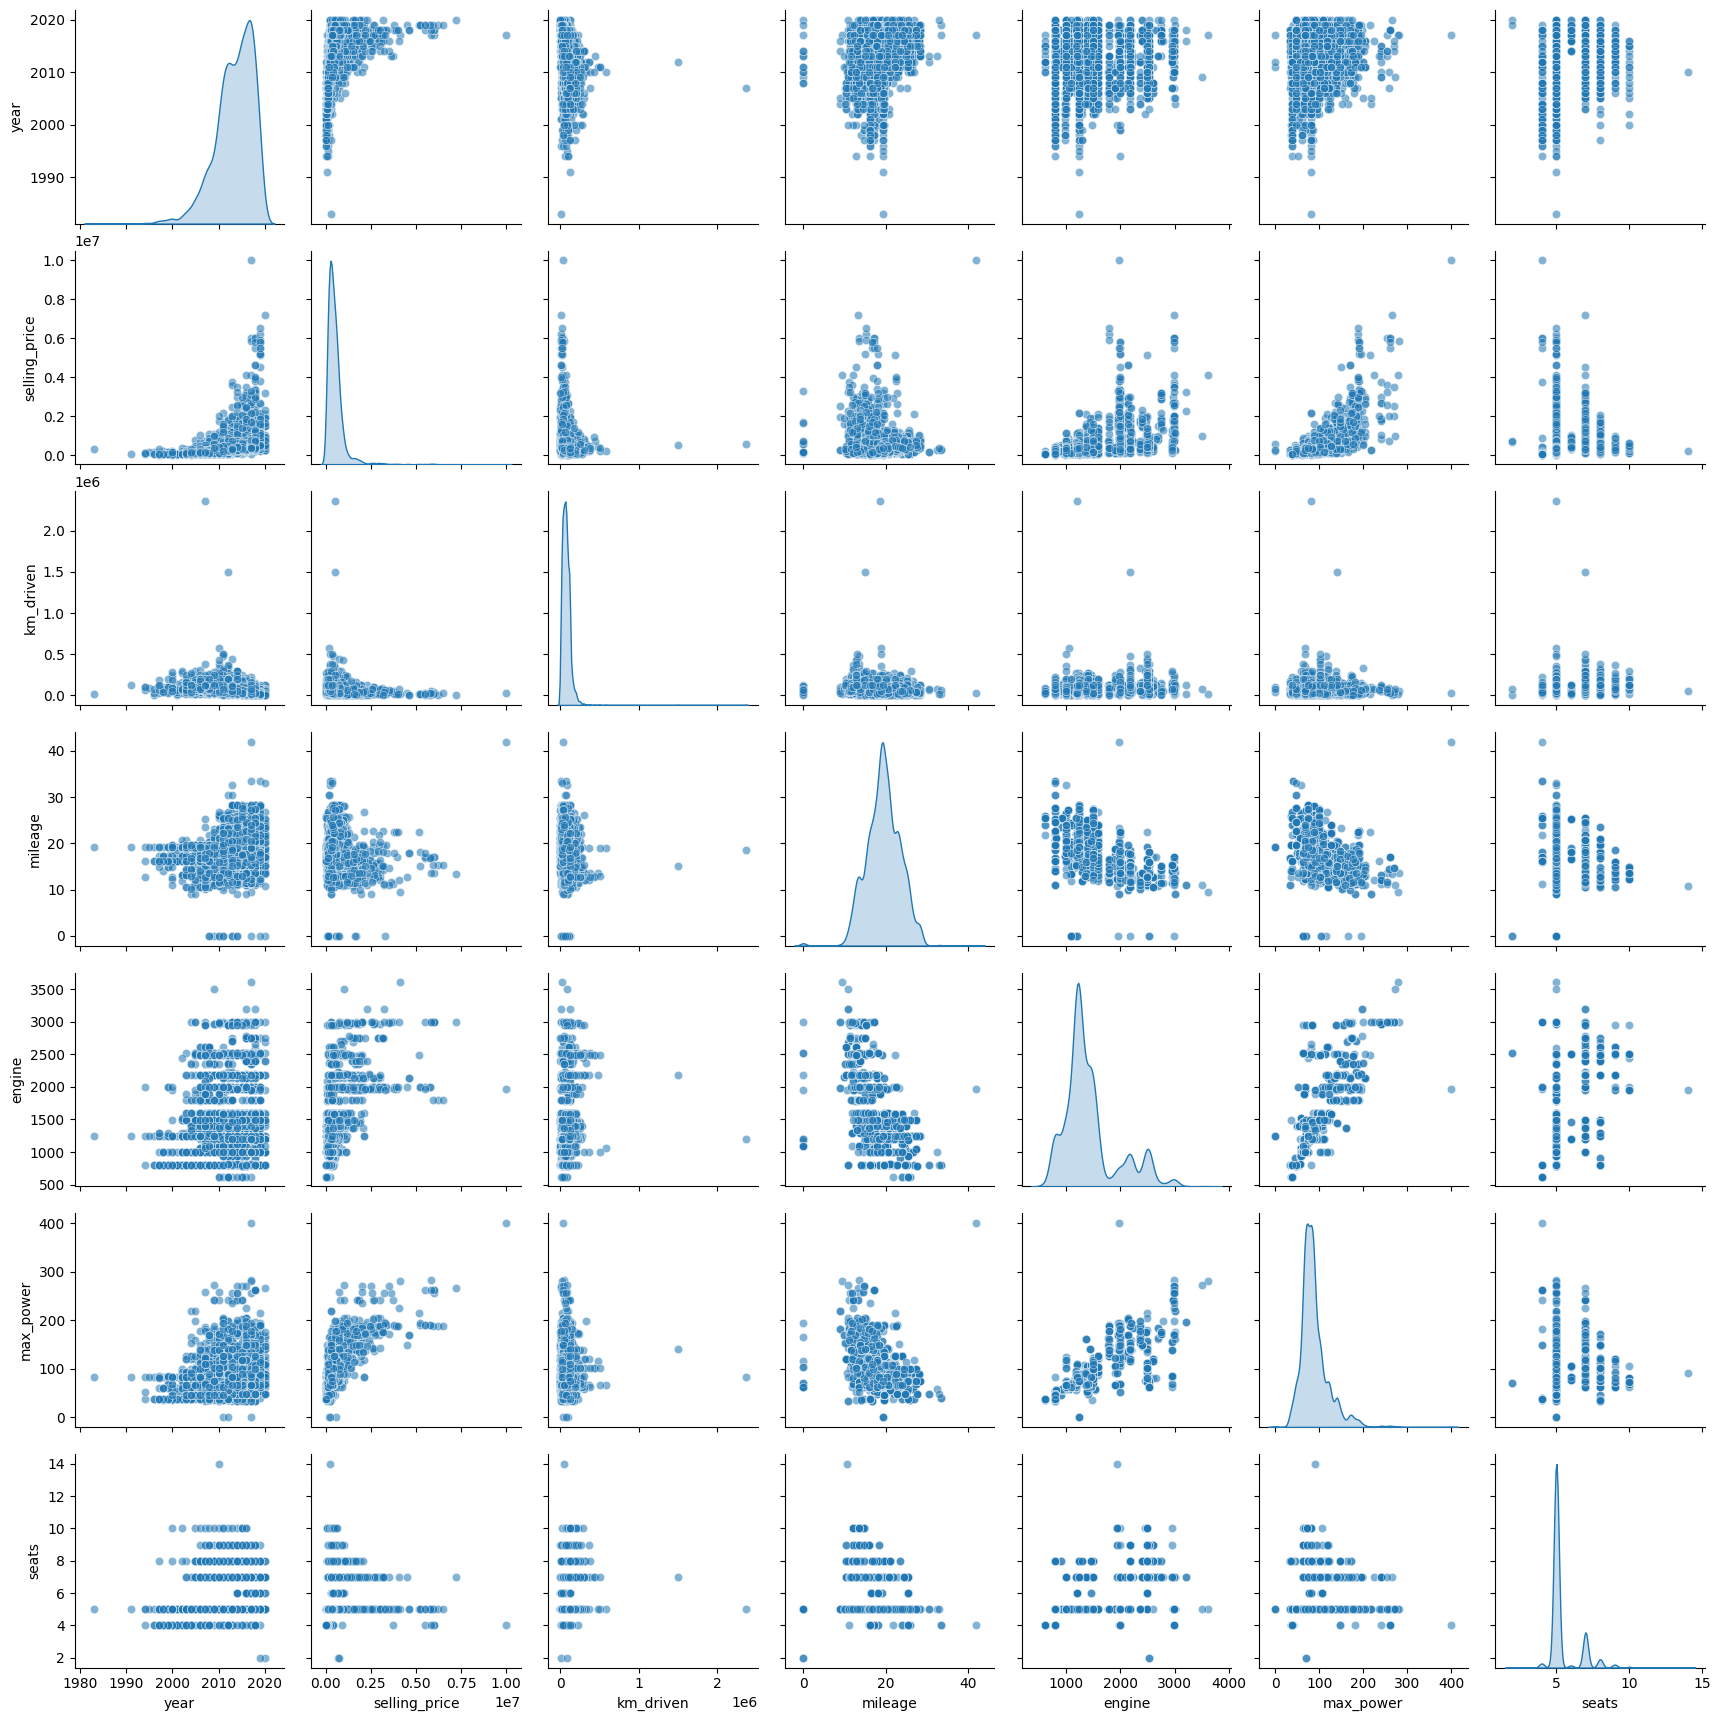

In [50]:
df_train_num = df_train[df_train.select_dtypes(include=[float, int]).columns]

pairplot = sns.pairplot(df_train_num, diag_kind="kde", plot_kws={'alpha': 0.556})
plt.show()

**Ответы на вопросы**

1. *Можно ли предположить на основе распределений связь признаков с целевой переменной?*

Можно отметить, что при увеличении пробега автомобилей (km_driven), целевая переменная скорее уменьшается.

Для engine и max_power визуально связь кажется более явной - автомобили с бо́льшими объемами двигателей и мощностью имеют более высокую цену.

Относительно уear тоже можно сказать, что наблюдается зависимость, которая вполне соотносится с логикой данных - чем новее машина (то есть чем year выше, тем больше цена).

2. *Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?*

Судя по графикам, между engine и max_power имеется положительная корреляция; между mileage и engine - вероятно отрицательная.


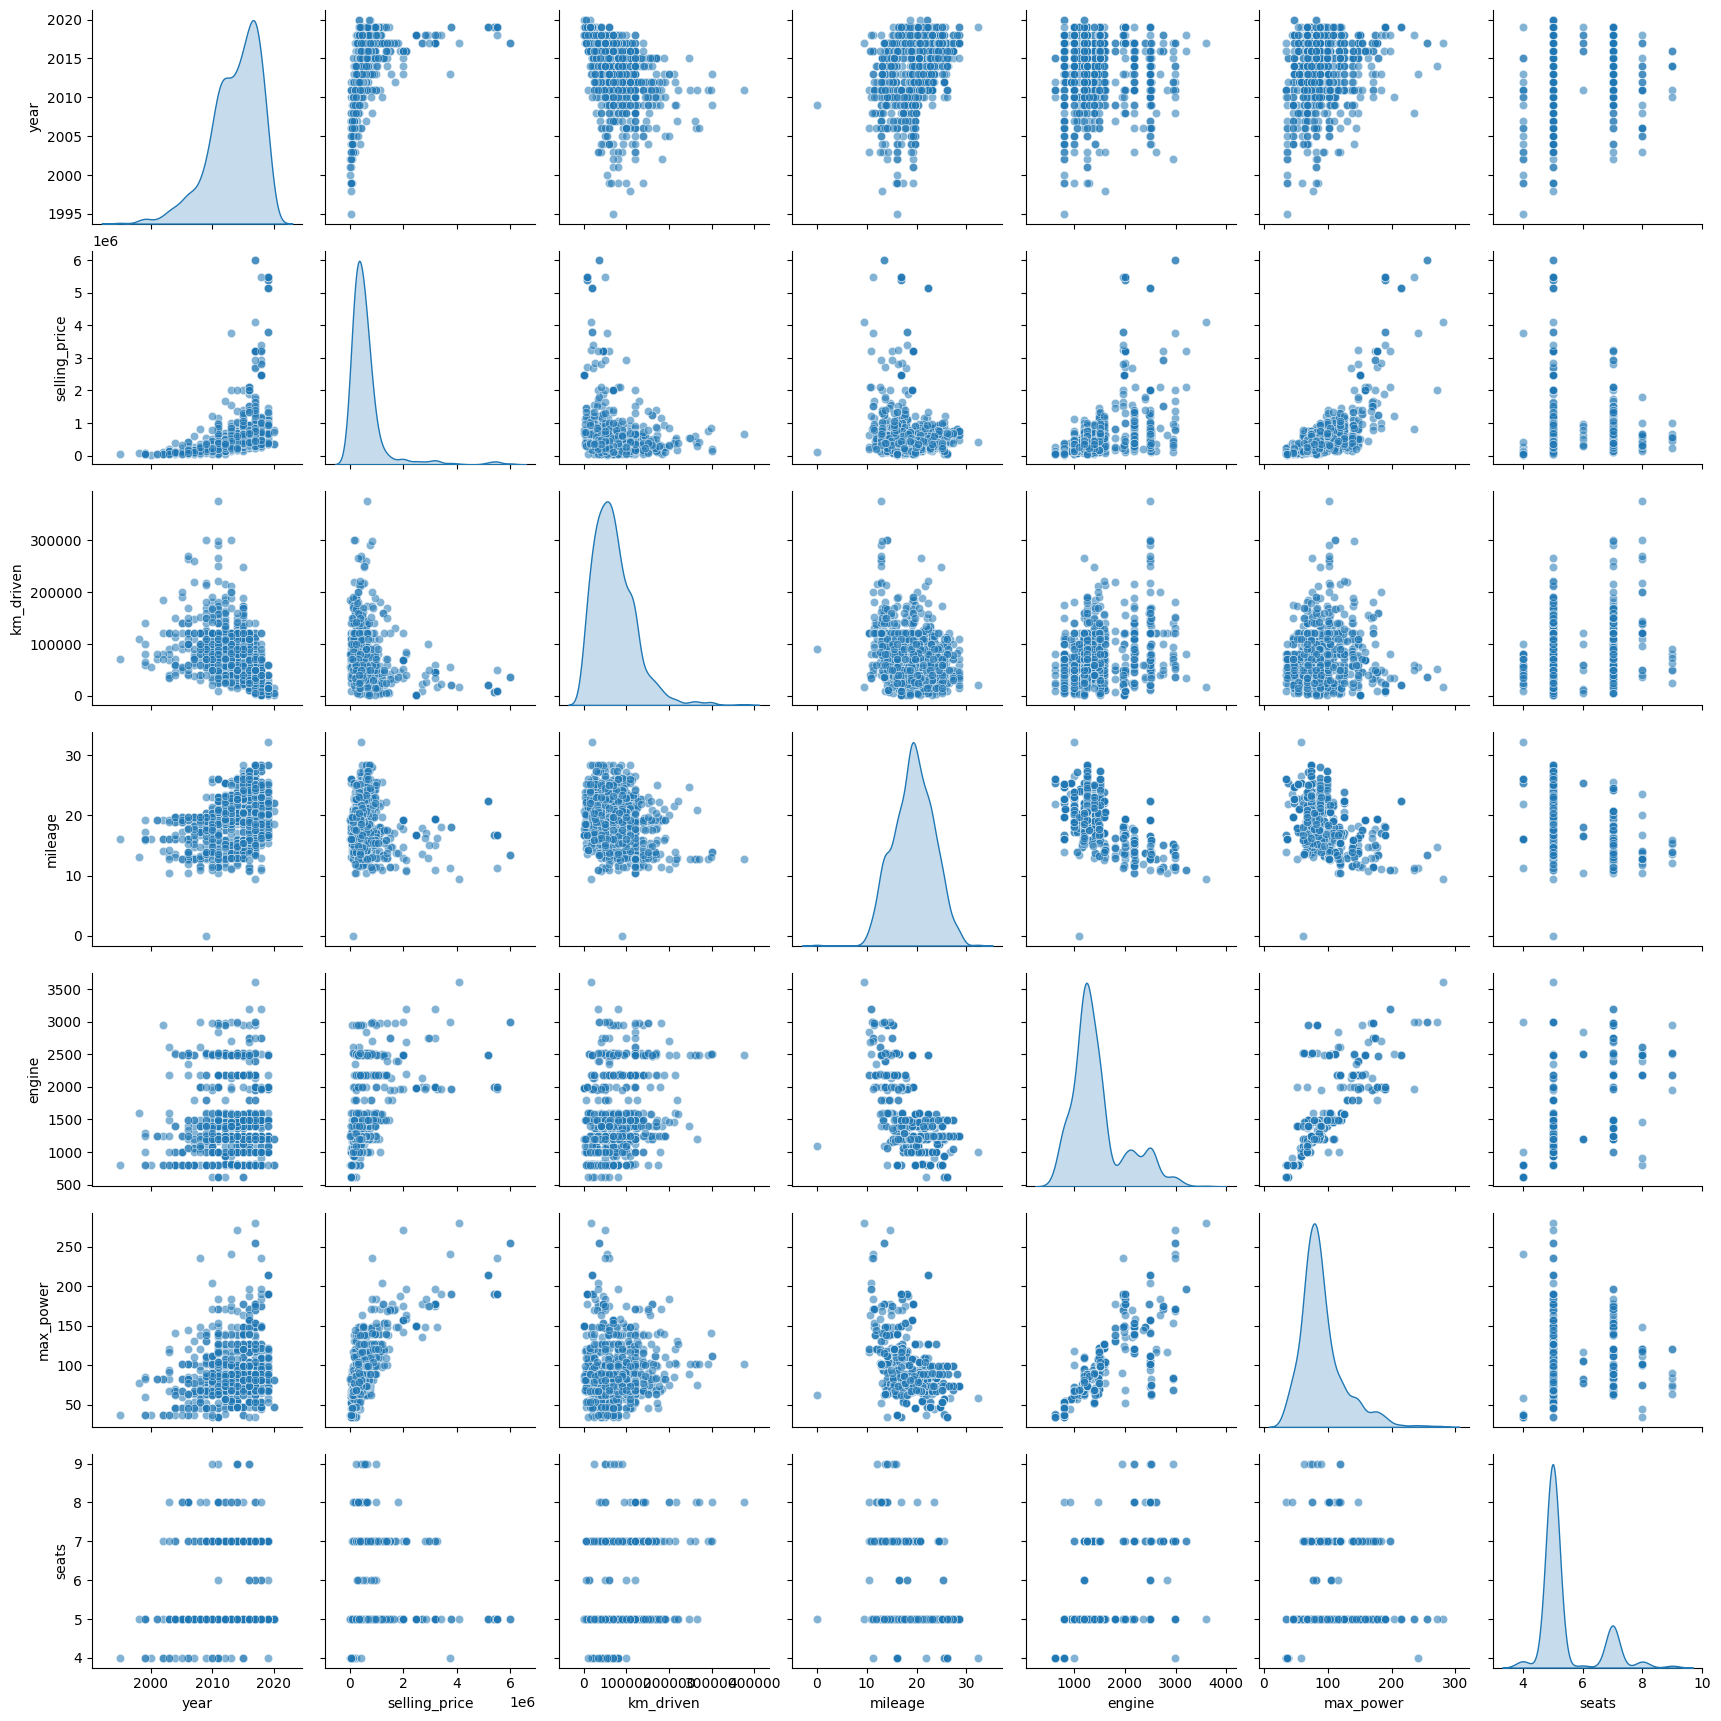

In [51]:
df_test_num = df_test[df_test.select_dtypes(include=[float, int]).columns]

pairplot = sns.pairplot(df_test_num, diag_kind="kde", plot_kws={'alpha': 0.556})
plt.show()

**Ответ на вопрос**

*Похожими ли оказались совокупности при разделении на трейн и тест?*

Распределения целевой переменной (selling_price) выглядят схожими в train и в test. Некоторые зависимости чуть более выражены - например целевая переменная и km_driven.

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

In [52]:
num_train2 = df_train.select_dtypes(include=['number'])
corr1 = num_train2.corr(method='pearson')
corr1

,year,selling_price,km_driven,mileage,engine,max_power,seats
year,1.000000,0.427279,-0.368966,0.342172,0.002819,0.156648,0.041178
selling_price,0.427279,1.000000,-0.164828,-0.104458,0.447672,0.692754,0.149953
km_driven,-0.368966,-0.164828,1.000000,-0.182245,0.229766,0.024630,0.192328
mileage,0.342172,-0.104458,-0.182245,1.000000,-0.572677,-0.373271,-0.450810
engine,0.002819,0.447672,0.229766,-0.572677,1.000000,0.681082,0.652172
max_power,0.156648,0.692754,0.024630,-0.373271,0.681082,1.000000,0.244060
seats,0.041178,0.149953,0.192328,-0.450810,0.652172,0.244060,1.000000


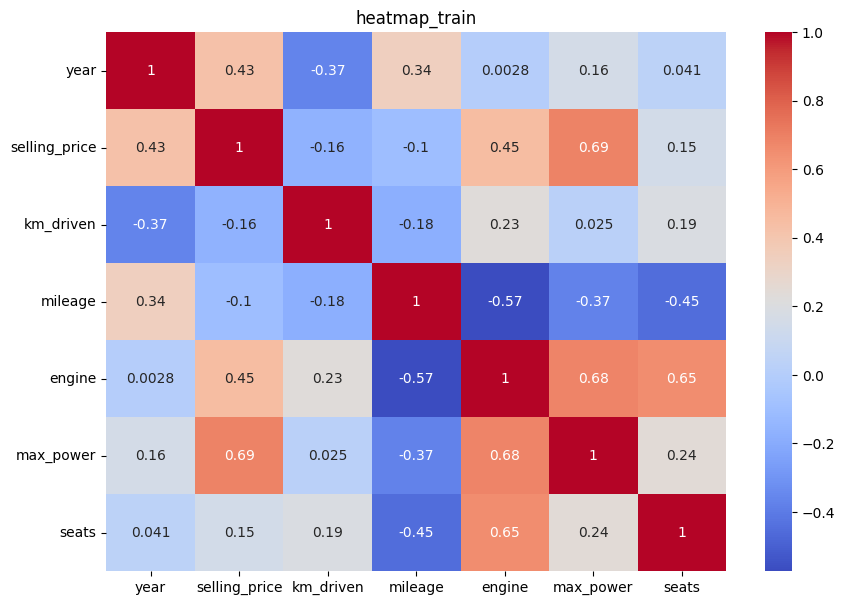

In [53]:
plt.figure(figsize=(10, 7))
sns.heatmap(corr1, annot=True, cmap="coolwarm", cbar=True)
plt.title("heatmap_train")
plt.show()

**Ответы на вопросы**

*1. Какие 2 признака наименее скоррелированы между собой?*

Значение корреляции между "engine" и "year" наиболее близко к нулю (0.0028)

*2. Между какими наблюдается довольно сильная положительная линейная зависимость?*

Наиболее сильная положительная корреляция - между "max_power" и "engine" (0.68).

*3. Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?*

Если говорить только о анализе корреляции, то да: коэффициент между "year" и "km_driven" составляет -0.37.

### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

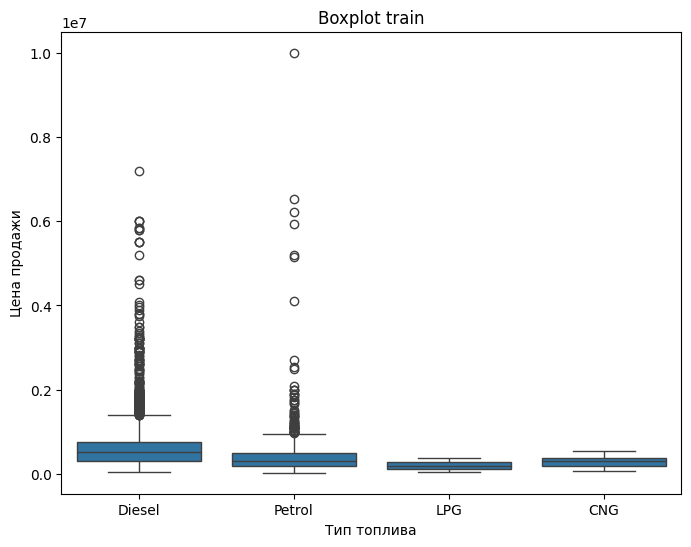

In [54]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='fuel', y='selling_price', data=df_train)
plt.title('Boxplot train')
plt.xlabel('Тип топлива')
plt.ylabel('Цена продажи')
plt.show()

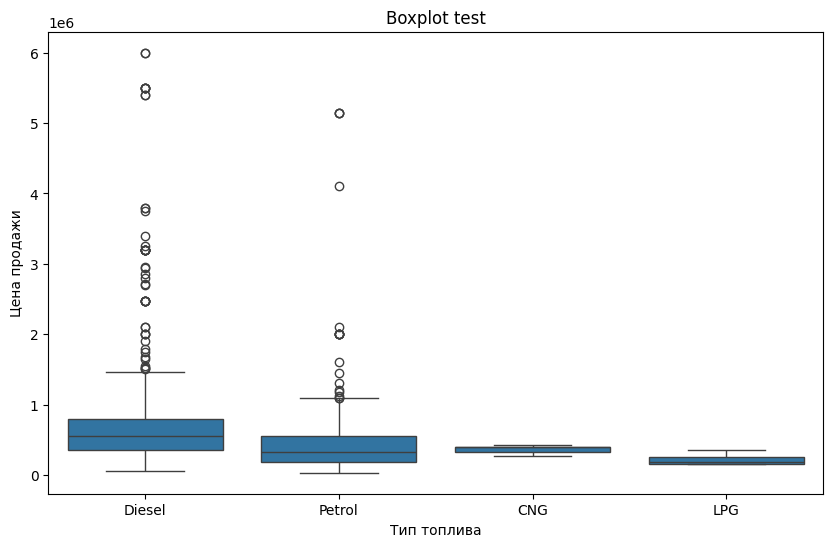

In [55]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='fuel', y='selling_price', data=df_test)
plt.title('Boxplot test')
plt.xlabel('Тип топлива')
plt.ylabel('Цена продажи')
plt.show()

Медиана цены автомобилей на дизельном топливе выше по сравнению с остальными видами топлива; имеется большое количество выбросов, CNG и LPG автомобили являются самыми бюджетными, с наменьшей вариативностью цен.

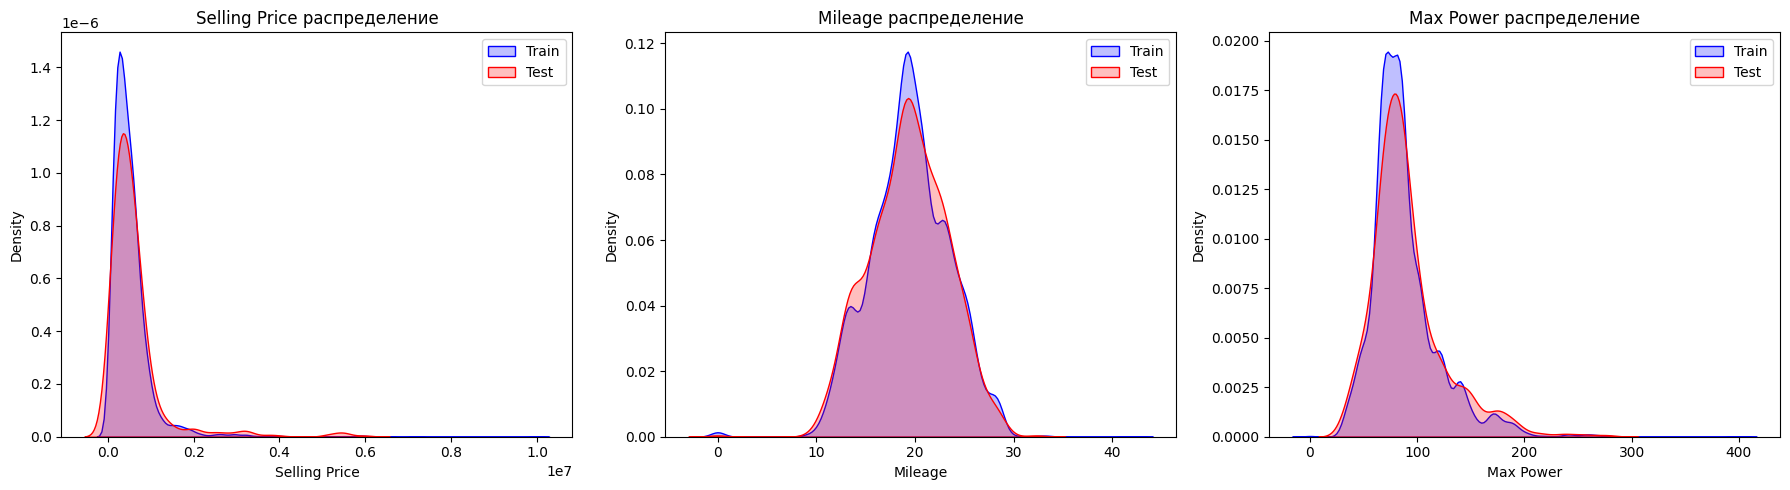

In [56]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.kdeplot(df_train['selling_price'], label='Train', fill=True, color='blue')
sns.kdeplot(df_test['selling_price'], label='Test', fill=True, color='red')
plt.title('Selling Price распределение')
plt.xlabel('Selling Price')
plt.legend()

plt.subplot(1, 3, 2)
sns.kdeplot(df_train['mileage'], label='Train', fill=True, color='blue')
sns.kdeplot(df_test['mileage'], label='Test', fill=True, color='red')
plt.title('Mileage распределение')
plt.xlabel('Mileage')
plt.legend()

plt.subplot(1, 3, 3)
sns.kdeplot(df_train['max_power'], label='Train', fill=True, color='blue')
sns.kdeplot(df_test['max_power'], label='Test', fill=True, color='red')
plt.title('Max Power распределение')
plt.xlabel('Max Power')
plt.legend()

plt.tight_layout()
plt.show()

По данным признакам распределения для обучающей и тестовой выборок очень схожи.

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [57]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           5840 non-null   object 
 1   year           5840 non-null   int64  
 2   selling_price  5840 non-null   int64  
 3   km_driven      5840 non-null   int64  
 4   fuel           5840 non-null   object 
 5   seller_type    5840 non-null   object 
 6   transmission   5840 non-null   object 
 7   owner          5840 non-null   object 
 8   mileage        5840 non-null   float64
 9   engine         5840 non-null   Int64  
 10  max_power      5840 non-null   float64
 11  seats          5840 non-null   Int64  
dtypes: Int64(2), float64(2), int64(3), object(5)
memory usage: 559.0+ KB


In [58]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           1000 non-null   object 
 1   year           1000 non-null   int64  
 2   selling_price  1000 non-null   int64  
 3   km_driven      1000 non-null   int64  
 4   fuel           1000 non-null   object 
 5   seller_type    1000 non-null   object 
 6   transmission   1000 non-null   object 
 7   owner          1000 non-null   object 
 8   mileage        1000 non-null   float64
 9   engine         1000 non-null   Int64  
 10  max_power      1000 non-null   float64
 11  seats          1000 non-null   Int64  
dtypes: Int64(2), float64(2), int64(3), object(5)
memory usage: 95.8+ KB


In [59]:
# только численные признаки
train1 = df_train.select_dtypes(include=['float64', 'int64'])

In [60]:
test1 = df_test.select_dtypes(include=['float64', 'int64'])

In [61]:
y_train = train1['selling_price']
X_train = train1.drop(columns=['selling_price'])

In [62]:
assert X_train.shape == (5840, 6)

In [63]:
y_test = test1['selling_price']
X_test = test1.drop(columns=['selling_price'])

In [64]:
assert X_test.shape == (1000, 6)

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

In [66]:
model = LinearRegression()

In [67]:
model.fit(X_train, y_train)

LinearRegression()

In [68]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [69]:
train_r2 = r2_score(y_train, y_train_pred)
train_r2

0.5922629595849875

In [70]:
train_mse = MSE(y_train, y_train_pred)
train_mse

116873067751.52162

In [71]:
test_r2 = r2_score(y_test, y_test_pred)
test_r2

0.5941441219017134

In [72]:
test_mse = MSE(y_test, y_test_pred)
test_mse

233297548204.61063

Имеется пособность объяснять около 59% вариативности целевой переменной; высокая MSE говорит о том, что ошибки предсказания в абсолютных значениях достаточно велики.

### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [73]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [74]:
X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)

In [75]:
model2 = LinearRegression()
model2.fit(X_train_scl, y_train)

LinearRegression()

In [76]:
y_train_pred_scl = model2.predict(X_train_scl)
y_test_pred_scl = model2.predict(X_test_scl)

In [77]:
train_r2_scl = r2_score(y_train, y_train_pred_scl)
train_r2_scl

0.5922629595849875

In [78]:
train_mse_scl = MSE(y_train, y_train_pred_scl)
train_mse_scl

116873067751.52162

In [79]:
test_r2_scl = r2_score(y_test, y_test_pred_scl)
test_r2_scl

0.5941441219017262

In [80]:
test_mse_scl = MSE(y_test, y_test_pred_scl)
test_mse_scl

233297548204.6033

Результаты R^2 и MSE практически не изменились.

### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [81]:
coef = model2.coef_
coef

array([152843.26235772, -44148.04751104,  28781.08659475,  61176.85714999,
       322779.70323584, -23220.5702262 ])

In [82]:
X_train.columns

Index(['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats'], dtype='object')

Наиболее важным признаком оказалась max_power (322779.70323584).


### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [83]:
from sklearn.linear_model import Lasso

In [84]:
model3 = Lasso()
model3.fit(X_train_scl, y_train)

Lasso()

In [85]:
y_train_pred_lss = model3.predict(X_train_scl)
y_test_pred_lss = model3.predict(X_test_scl)

In [86]:
train_r2_lss = r2_score(y_train, y_train_pred_lss)
train_r2_lss

0.5922629595497046

In [87]:
train_mse_lss = MSE(y_train, y_train_pred_lss)
train_mse_lss

116873067761.63504

In [88]:
test_r2_ls = r2_score(y_test, y_test_pred_lss)
test_r2_ls

0.5941429546560312

In [89]:
test_mse_lss = MSE(y_test, y_test_pred_lss)
test_mse_lss

233298219170.76022

In [90]:
lasso_coef = model3.coef_
lasso_coef

array([152843.08385345, -44146.91853785,  28779.20408499,  61172.02578008,
       322780.58619708, -23217.69327311])

Ни один коэффициент не был занулен. Возможно, у нас не так много признаков - и все они вносят вклад в модель. К тому же, использовалось стандартное значение альфа.

### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [91]:
from sklearn.model_selection import GridSearchCV

In [92]:
from sklearn.metrics import make_scorer, r2_score

In [93]:
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

In [94]:
lasso = Lasso(max_iter=10000)

In [95]:
grid_search = GridSearchCV(
    estimator=lasso,
    param_grid=param_grid,
    scoring=make_scorer(r2_score),
    cv=10,
)

In [96]:
grid_search.fit(X_train_scl, y_train)

GridSearchCV(cv=10, estimator=Lasso(max_iter=10000),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring=make_scorer(r2_score, response_method='predict'))

In [97]:
best_alpha = grid_search.best_params_['alpha']
best_alpha

100

In [98]:
best_r2 = grid_search.best_score_
best_r2

0.5682328004899914

In [99]:
best_lasso = grid_search.best_estimator_
lasso_coefficients = best_lasso.coef_
lasso_coefficients

array([152819.5529717 , -44037.83207098,  28601.04061998,  60701.69450513,
       322866.99092623, -22933.37348536])

Грид-сёрчу пришлось обучать 60 моделей (10*6); оптимальный коэфициент альфа = 100; при этом ни один из весов не стал равным нулю.

In [100]:
y_train_pred_best = best_lasso.predict(X_train_scl)
y_test_pred_best = best_lasso.predict(X_test_scl)

In [101]:
train_mse_best = MSE(y_train, y_train_pred_best)
test_mse_best = MSE(y_test, y_test_pred_best)

In [102]:
train_mse_best

116873166388.82776

In [103]:
test_mse_best

233364631456.09937

In [104]:
train_r2_best = r2_score(y_train, y_train_pred_best)
test_r2_best = r2_score(y_test, y_test_pred_best)

In [105]:
train_r2_best

0.5922626154673558

In [106]:
test_r2_best

0.5940274205812401

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [107]:
from sklearn.linear_model import ElasticNet

In [108]:
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100], 'l1_ratio': [0.1, 0.5, 0.7, 0.9, 1.0]}

In [109]:
elastic_net = ElasticNet(max_iter=10000)

In [110]:
grid_search = GridSearchCV(
    estimator=elastic_net,
    param_grid=param_grid,
    scoring=make_scorer(r2_score),
    cv=10,
    n_jobs=-1
)

In [111]:
grid_search.fit(X_train_scl, y_train)

GridSearchCV(cv=10, estimator=ElasticNet(max_iter=10000), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 1.0]},
             scoring=make_scorer(r2_score, response_method='predict'))

In [112]:
best_params = grid_search.best_params_
best_params

{'alpha': 1, 'l1_ratio': 0.9}

In [113]:
best_r2 = grid_search.best_score_
best_r2

0.5761378555173833

In [114]:
best_elastic_net = grid_search.best_estimator_
elastic_net_coefficients = best_elastic_net.coef_
elastic_net_coefficients

array([146041.11461375, -46021.21571588,  22845.76274071,  79237.72636177,
       281536.65815575, -24516.39609253])

С учетом 10 фолдов - обучение 250 моделей. Оптимальные параметры: альфа = 1 и l1_ratio = 0,9.

In [115]:
y_train_pred_en = best_elastic_net.predict(X_train_scl)
y_test_pred_en = best_elastic_net.predict(X_test_scl)

In [116]:
train_mse_en = MSE(y_train, y_train_pred_en)
test_mse_en = MSE(y_test, y_test_pred_en)


In [117]:
train_mse_en

117992231505.21768

In [118]:
test_mse_en

245892672007.79788

In [119]:
train_r2_en = r2_score(y_train, y_train_pred_en)
test_r2_en = r2_score(y_test, y_test_pred_en)

In [120]:
train_r2_en

0.5883585141430149

In [121]:
test_r2_en

0.572233025663291

# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.

### **Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`

In [122]:
#df_test = df_test.drop(columns=['name'])
#df_train = df_train.drop(columns=['name'])

В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

### **Бонус 0.5 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [123]:
df_train['name']

,name
0,Maruti Swift Dzire VDI
1,Skoda Rapid 1.5 TDI Ambition
2,Hyundai i20 Sportz Diesel
3,Maruti Swift VXI BSIII
4,Hyundai Xcent 1.2 VTVT E Plus
...,...
5835,Hyundai Santro Xing GLS
5836,Maruti Wagon R VXI BS IV with ABS
5837,Hyundai i20 Magna
5838,Hyundai Verna CRDi SX


In [124]:
name_frequency = df_train['name'].value_counts()
name_frequency.head(5)

,count
name,
Maruti Swift Dzire VDI,91
Maruti Alto 800 LXI,58
Maruti Alto LXi,56
Maruti Swift VDI,48
Maruti Swift VDI BSIV,47


In [125]:
popular = name_frequency[name_frequency >= 10].sum()
popular

1933

Тогда name будет отвечать за популярность;

In [126]:
df_train['name'] = df_train['name'].apply(lambda x: 1 if name_frequency[x] >= 10 else 0)
df_train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,1,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5
1,0,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5
2,0,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5
3,0,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5
4,0,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,5


In [127]:
df_train['name'].value_counts()

,count
name,
0,3907
1,1933


In [128]:
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,1,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5
1,0,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5
2,0,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5
3,0,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5
4,0,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,5
...,...,...,...,...,...,...,...,...,...,...,...,...
5835,1,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92,1086,62.10,5
5836,0,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998,67.10,5
5837,1,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,5
5838,0,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,5


То же самое для test:

In [129]:
name_frequency2 = df_test['name'].value_counts()
name_frequency2.head(5)

,count
name,
Maruti Alto 800 LXI,15
Maruti Swift Dzire VDI,12
Maruti Swift VDI,10
Honda Jazz VX,8
Maruti Alto LXi,8


In [130]:
df_test['name'] = df_test['name'].apply(lambda x: 1 if name_frequency2[x] >= 5 else 0)

In [131]:
df_test['name'].value_counts()

,count
name,
0,820
1,180


Из-за специфики выборки получаются очень несбалансированные классы - даже при снижении порога для тестовой выборки (что спорное решение, наверное); поэтому все-таки я решил удалить name.

Также, были мысли оставить только названия бренда по первому слову, но при кодировании это все равно даст слишком много признаков.

In [132]:
X_train_cat = df_train.drop(columns=['selling_price'])
X_test_cat = df_test.drop(columns=['selling_price'])

In [133]:
X_train_cat

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,1,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5
1,0,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5
2,0,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5
3,0,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5
4,0,2017,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,5
...,...,...,...,...,...,...,...,...,...,...,...
5835,1,2008,191000,Petrol,Individual,Manual,First Owner,17.92,1086,62.10,5
5836,0,2013,50000,Petrol,Individual,Manual,Second Owner,18.90,998,67.10,5
5837,1,2013,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,5
5838,0,2007,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,5


In [134]:
X_train_cat = X_train_cat.drop(columns=['name'])
X_test_cat = X_test_cat.drop(columns=['name'])

In [135]:
assert X_train_cat.shape == (5840, 10)

In [136]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


In [137]:
X_test_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,1000,1000,1000,1000
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,534,837,877,623


### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [138]:
cat = ['fuel', 'seller_type', 'transmission', 'owner', 'seats']

In [139]:
X_train_cat = pd.get_dummies(X_train_cat, drop_first=True)
X_test_cat = pd.get_dummies(X_test_cat, drop_first=True)

In [140]:
X_train_cat.head(4)

,year,km_driven,mileage,engine,max_power,seats,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2014,145500,23.40,1248,74.00,5,True,False,False,True,False,True,False,False,False,False
1,2014,120000,21.14,1498,103.52,5,True,False,False,True,False,True,False,True,False,False
2,2010,127000,23.00,1396,90.00,5,True,False,False,True,False,True,False,False,False,False
3,2007,120000,16.10,1298,88.20,5,False,False,True,True,False,True,False,False,False,False


### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [141]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [142]:
scaler = StandardScaler()
X_train_scl2 = scaler.fit_transform(X_train_cat)
X_test_scl2 = scaler.transform(X_test_cat)

In [143]:
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100, 500, 2000]}

In [144]:
ridge = Ridge()

In [145]:
grid_search = GridSearchCV(
    estimator=ridge,
    param_grid=param_grid,
    scoring=make_scorer(r2_score),
    cv=10,
)

In [146]:
grid_search.fit(X_train_scl2, y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100, 500, 2000]},
             scoring=make_scorer(r2_score, response_method='predict'))

In [147]:
best_ridge_model = grid_search.best_estimator_
best_alpha = grid_search.best_params_['alpha']
best_r2 = grid_search.best_score_

In [148]:
test_r2 = r2_score(y_test, best_ridge_model.predict(X_test_scl2))

In [149]:
best_alpha

500

In [150]:
best_r2

0.6038273159844502

In [151]:
test_r2

0.6090742791376493

R^2 повысился.

In [152]:
final_ridge_model = Ridge(alpha=500)
final_ridge_model.fit(X_train_scl2, y_train)

Ridge(alpha=500)

In [153]:
y_train_pred_ridge = final_ridge_model.predict(X_train_scl2)
y_test_pred_ridge = final_ridge_model.predict(X_test_scl2)

In [154]:
train_mse_ridge = MSE(y_train, y_train_pred_ridge)
test_mse_ridge = MSE(y_test, y_test_pred_ridge)

In [155]:
train_mse_ridge

101181320430.73737

In [156]:
test_mse_ridge

224715267485.22275

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [157]:
def business_metric(y_true, y_pred):

    dif = np.abs(y_true - y_pred)
    err = dif / y_true
    a10 = np.sum(err <= 0.1) / len(y_true)
    return a10

In [158]:
ridge_business = business_metric(y_test, best_ridge_model.predict(X_test_scl2))
ridge_business

0.243

In [159]:
lasso_business = business_metric(y_test, best_lasso.predict(X_test_scl))
lasso_business

0.227

In [160]:
elasticnet_business = business_metric(y_test, best_elastic_net.predict(X_test_scl))
elasticnet_business

0.241

In [161]:
linreg_business = business_metric(y_test, model2.predict(X_test_scl))
linreg_business

0.227

In [162]:
linreg1_business = business_metric(y_test, model.predict(X_test))
linreg1_business

0.227

Лучшей моделью с точки зрения бизнес-метрики является Ridge-регрессия, которая показала значение 0.243. Это означает, что 24.3% предсказаний этой модели отличаются от реальных цен не более чем на 10%.



# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой!

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/XbnpCTg)

</details>


**Угадываение КОТА:**

Будем надеяться, что это кот/кошка @sabrina_sadiekh  

(^._.^)